In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
df = pd.read_csv('drive/My Drive/dataset.csv')

In [13]:
df.head()

,id,ProId,ProCreationTimestamp,CustId,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TaskState,TargetProId,isFraud
0,VkSa32MyS738HMkfk4tEfk,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,SgcxJApdnttAvEN9865TSZ,1565441404199,5,1565608270089,362000.0,bKv8JeCDhHBCe8SnfDcv66,VzkJEPR5H3mnqctJ8TW3YS,98DpwFpuLYJtF6jajghriE,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,FDPHLhrcjx3Gww4syg43Po,KaLEhwzZxCQ7GjPmVwBVav,1558262535289,EveEDVPDDDq3Ljh3bg8Exn,1561655121208,5,1563280381472,NaN,aegfi8HeWASAP6a9YkddeL,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,6Z7CCQoHpC8ga8KZbsgUbx,pybDYgTiCUv3Pv3WLgxKCM,1558538960723,mrDLWRmWuxGD7TVPAsD5X6,1545554406049,1,1566297337468,NaN,uDHVz7XXXRCkGKWRUe2jKp,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
3,n5DKFF8SJYoP57ypvpCEg5,zqPiDV33KwrMBZoyeQXMJW,1507727811649,aK3MnLeQywfLYMJJNyu7i8,1512288789660,4,1522825078700,NaN,Jy7nZvUqvwDUhcAG59wPcg,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
4,oCwEhmYhhzHkuZyqQCusFU,CR8z3ThPyzBKXFqqzemQAS,1560860808052,vHjzucgXFu9eA9YhuEeuk4,1561328838459,1,1564542737897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False


In [14]:
df.CategoryId.unique()

array(['VzkJEPR5H3mnqctJ8TW3YS', 'Ax5bRJZGir8vaZMs3ZB9i5',
       'JdqYJwUosvwivsFdThmcXe', 'v97njuq76L7f36VHZPbuJX',
       'L3a2wDTjmBCiSEE5nzkomU', 'kRyJUveqktavaCXyhPdceK',
       'HnKFgSQGdwEj7q6Z8ws4cb', 'qgqzVtnssiJTjR7tjbWW6m'], dtype=object)

In [16]:
df.ZoneId.nunique()

43

In [17]:
df.TaskState.unique()

array(['Finished', 'Canceled', 'Waiting'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


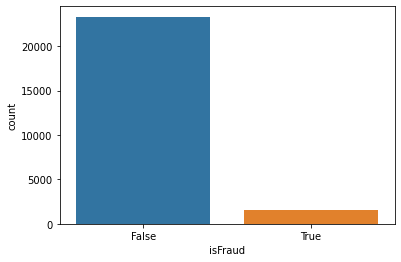

In [18]:
sns.countplot(df['isFraud'])

In [19]:
df.isnull().sum()

id                           0
ProId                        0
ProCreationTimestamp         0
CustId                       0
CustCreationTimestamp        0
Rate                         0
TaskCreationTimestamp        0
Price                     5989
ServiceId                    0
CategoryId                   0
ZoneId                       0
TaskState                    0
TargetProId              22304
isFraud                      0
dtype: int64

In [ ]:
df.isnull().sum()['TargetProId']/len(df)*100

89.73647153490244

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


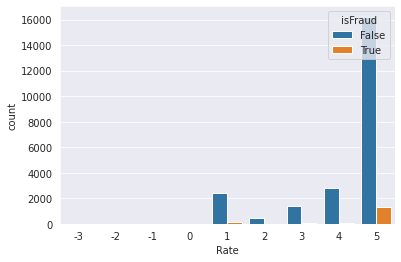

In [24]:
sns.set_style('darkgrid')
sns.countplot(df['Rate'],hue=df['isFraud'])

In [26]:
df['Rate'].value_counts()

 5    17517
 4     2894
 1     2548
 3     1394
 2      497
-1        2
-2        1
-3        1
 0        1
Name: Rate, dtype: int64

In [27]:
df = df[(df['Rate']==5) | (df['Rate']== 4) | (df['Rate']==3) | (df['Rate']== 2) | (df['Rate']== 1)]

In [28]:
df['Rate'].value_counts()

5    17517
4     2894
1     2548
3     1394
2      497
Name: Rate, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


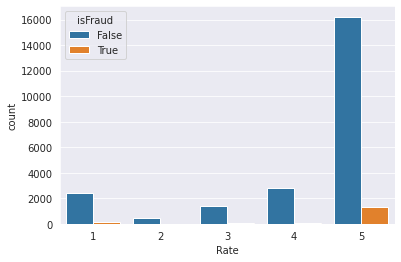

In [29]:
sns.countplot(df['Rate'],hue=df['isFraud'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


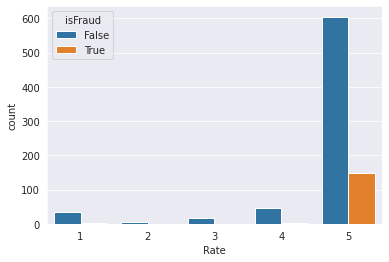

In [30]:
sns.countplot(df[df['TargetProId']==df['ProId']]['Rate'],hue=df['isFraud'])
#df[df['TargetProId']==df['ProId']]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 0 to 24854
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24850 non-null  object 
 1   ProId                  24850 non-null  object 
 2   ProCreationTimestamp   24850 non-null  int64  
 3   CustId                 24850 non-null  object 
 4   CustCreationTimestamp  24850 non-null  int64  
 5   Rate                   24850 non-null  int64  
 6   TaskCreationTimestamp  24850 non-null  int64  
 7   Price                  18864 non-null  float64
 8   ServiceId              24850 non-null  object 
 9   CategoryId             24850 non-null  object 
 10  ZoneId                 24850 non-null  object 
 11  TaskState              24850 non-null  object 
 12  TargetProId            2551 non-null   object 
 13  isFraud                24850 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(8)
memory usa

In [32]:
df['ServiceId'].nunique()

213

In [33]:
df_d = df.drop(['id','CustId'],axis=1)

In [34]:
df_d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProCreationTimestamp,24850.0,1.543043e+12,1.639980e+10,1.507728e+12,1.532284e+12,1.544953e+12,1.555948e+12,1.575833e+12
CustCreationTimestamp,24850.0,1.551513e+12,1.610955e+10,1.497352e+12,1.542110e+12,1.554990e+12,1.563549e+12,1.575906e+12
Rate,24850.0,4.301207e+00,1.293509e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
TaskCreationTimestamp,24850.0,1.556129e+12,1.514889e+10,1.497352e+12,1.548406e+12,1.559752e+12,1.567248e+12,1.575960e+12
Price,18864.0,5.137408e+05,4.707664e+06,0.000000e+00,6.500000e+04,1.100000e+05,2.820000e+05,3.600000e+08


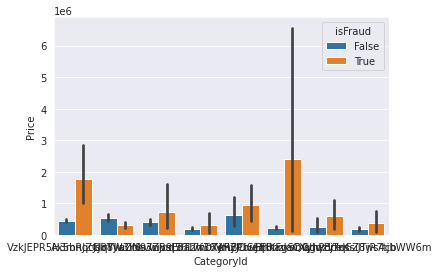

In [36]:
sns.barplot(data=df_d,x='CategoryId',y='Price',hue='isFraud')

In [37]:
#df_d['ZoneId'].nunique()
cat = df_d['CategoryId'].unique()
len(cat)

8

In [38]:
category = {cat[0]: 'A',cat[1]:'B',cat[2]: 'C',cat[3]: 'D',
            cat[4]: 'E',cat[5]: 'F',cat[6]: 'G',cat[7]: 'H'}


In [39]:
df_d['CategoryId'] = df['CategoryId'].map(category)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


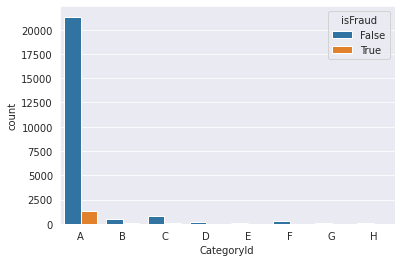

In [40]:
sns.set_style('darkgrid')
sns.countplot(df_d['CategoryId'],hue=df_d['isFraud'])


In [41]:
df_d.groupby('CategoryId').count()['isFraud']

CategoryId
A    22624
B      586
C      864
D      161
E      125
F      340
G       76
H       74
Name: isFraud, dtype: int64

In [42]:
df_d.groupby('CategoryId').sum()['isFraud']


CategoryId
A    1290
B      43
C      95
D      15
E      28
F      28
G      24
H      17
Name: isFraud, dtype: int64

In [43]:
df_d['TaskState'].value_counts()


Finished    24848
Waiting         1
Canceled        1
Name: TaskState, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


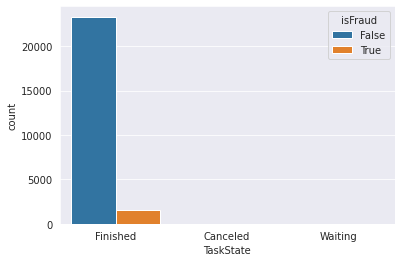

In [44]:
sns.countplot(df_d['TaskState'],hue=df_d['isFraud'])

In [45]:
df_d = df_d.drop('TaskState',axis=1)

In [47]:
df_d['ProCreationTimestamp'] = pd.to_datetime(df_d['ProCreationTimestamp'],unit='ms')
df_d['CustCreationTimestamp'] = pd.to_datetime(df_d['CustCreationTimestamp'],unit='ms')
df_d['TaskCreationTimestamp'] = pd.to_datetime(df_d['TaskCreationTimestamp'],unit='ms')
df_d.head()

,ProId,ProCreationTimestamp,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TargetProId,isFraud
0,vqUkxUDuEmB7gHWQvcYrBn,2019-03-16 15:55:51.302,2019-08-10 12:50:04.199,5,2019-08-12 11:11:10.089,362000.0,bKv8JeCDhHBCe8SnfDcv66,A,98DpwFpuLYJtF6jajghriE,vqUkxUDuEmB7gHWQvcYrBn,False
1,KaLEhwzZxCQ7GjPmVwBVav,2019-05-19 10:42:15.289,2019-06-27 17:05:21.208,5,2019-07-16 12:33:01.472,NaN,aegfi8HeWASAP6a9YkddeL,A,XZCnwH2vCRhHReoVx9X3XV,YvvjyjpmXxj43RJGBHPq2n,False
2,pybDYgTiCUv3Pv3WLgxKCM,2019-05-22 15:29:20.723,2018-12-23 08:40:06.049,1,2019-08-20 10:35:37.468,NaN,uDHVz7XXXRCkGKWRUe2jKp,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False
3,zqPiDV33KwrMBZoyeQXMJW,2017-10-11 13:16:51.649,2017-12-03 08:13:09.660,4,2018-04-04 06:57:58.700,NaN,Jy7nZvUqvwDUhcAG59wPcg,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False
4,CR8z3ThPyzBKXFqqzemQAS,2019-06-18 12:26:48.052,2019-06-23 22:27:18.459,1,2019-07-31 03:12:17.897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False


In [48]:
df_d['ProYear'] = df_d['ProCreationTimestamp'].apply(lambda year:year.year)
df_d['ProMonth'] = df_d['ProCreationTimestamp'].apply(lambda year:year.month)
df_d['ProDay'] = df_d['ProCreationTimestamp'].apply(lambda year:year.dayofyear)
df_d['ProHour'] = df_d['ProCreationTimestamp'].apply(lambda year:year.hour)

df_d['CustYear'] = df_d['CustCreationTimestamp'].apply(lambda year:year.year)
df_d['CustMonth'] = df_d['CustCreationTimestamp'].apply(lambda year:year.month)
df_d['CustDay'] = df_d['CustCreationTimestamp'].apply(lambda year:year.dayofyear)
df_d['CustHour'] = df_d['CustCreationTimestamp'].apply(lambda year:year.hour)

df_d['TaskYear'] = df_d['TaskCreationTimestamp'].apply(lambda year:year.year)
df_d['TaskMonth'] = df_d['TaskCreationTimestamp'].apply(lambda year:year.month)
df_d['TaskDay'] = df_d['TaskCreationTimestamp'].apply(lambda year:year.dayofyear)
df_d['TaskHour'] = df_d['TaskCreationTimestamp'].apply(lambda year:year.hour)


df_d.head()

,ProId,ProCreationTimestamp,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TargetProId,isFraud,ProYear,ProMonth,ProDay,ProHour,CustYear,CustMonth,CustDay,CustHour,TaskYear,TaskMonth,TaskDay,TaskHour
0,vqUkxUDuEmB7gHWQvcYrBn,2019-03-16 15:55:51.302,2019-08-10 12:50:04.199,5,2019-08-12 11:11:10.089,362000.0,bKv8JeCDhHBCe8SnfDcv66,A,98DpwFpuLYJtF6jajghriE,vqUkxUDuEmB7gHWQvcYrBn,False,2019,3,75,15,2019,8,222,12,2019,8,224,11
1,KaLEhwzZxCQ7GjPmVwBVav,2019-05-19 10:42:15.289,2019-06-27 17:05:21.208,5,2019-07-16 12:33:01.472,NaN,aegfi8HeWASAP6a9YkddeL,A,XZCnwH2vCRhHReoVx9X3XV,YvvjyjpmXxj43RJGBHPq2n,False,2019,5,139,10,2019,6,178,17,2019,7,197,12
2,pybDYgTiCUv3Pv3WLgxKCM,2019-05-22 15:29:20.723,2018-12-23 08:40:06.049,1,2019-08-20 10:35:37.468,NaN,uDHVz7XXXRCkGKWRUe2jKp,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False,2019,5,142,15,2018,12,357,8,2019,8,232,10
3,zqPiDV33KwrMBZoyeQXMJW,2017-10-11 13:16:51.649,2017-12-03 08:13:09.660,4,2018-04-04 06:57:58.700,NaN,Jy7nZvUqvwDUhcAG59wPcg,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False,2017,10,284,13,2017,12,337,8,2018,4,94,6
4,CR8z3ThPyzBKXFqqzemQAS,2019-06-18 12:26:48.052,2019-06-23 22:27:18.459,1,2019-07-31 03:12:17.897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,A,XZCnwH2vCRhHReoVx9X3XV,NaN,False,2019,6,169,12,2019,6,174,22,2019,7,212,3


In [49]:
print(df_d['ProYear'].unique(),df_d['ProMonth'].unique())


[2019 2017 2018] [ 3  5 10  6 11 12  1  7  8  2  4  9]


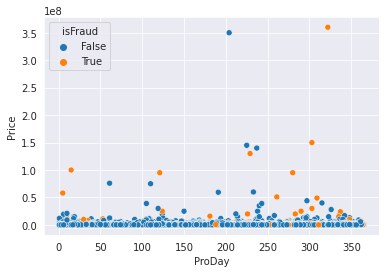

In [50]:
sns.scatterplot(data=df_d,x='ProDay',y='Price',hue='isFraud')

In [51]:
df_d = df_d[df_d['Price']<200000000]

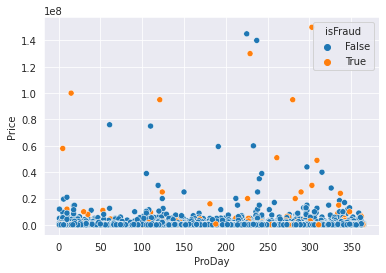

In [52]:
sns.scatterplot(data=df_d,x='ProDay',y='Price',hue='isFraud')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


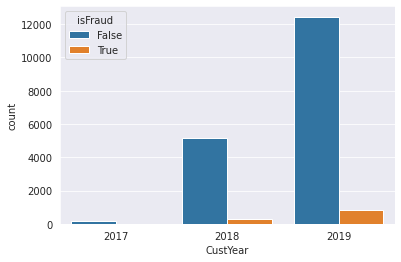

In [53]:
sns.countplot(df_d['CustYear'],hue=df_d['isFraud'])


In [54]:
df_d = df_d.drop(['ProCreationTimestamp','CustCreationTimestamp','TaskCreationTimestamp'],axis=1)
#df_d['Protime'].unique()


In [56]:
categ = pd.get_dummies(df_d['CategoryId'])
df_d = pd.concat([df_d,categ],axis=1)

In [57]:
df_d = df_d.drop('CategoryId',axis=1)

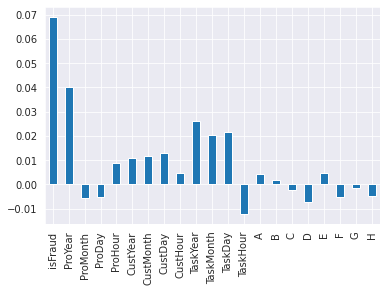

In [59]:
df_d.corr()['Price'][2:].plot(kind='bar')


In [60]:
df_d['Price']=df_d['Price'].fillna(df_d['Price'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


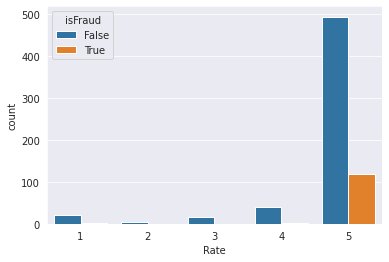

In [63]:
sns.countplot(df_d[df_d['TargetProId']==df_d['ProId']]['Rate'],hue=df_d[df_d['TargetProId']==df_d['ProId']]['isFraud'])

In [64]:
df_d['TargetPro'] = np.where(df_d['TargetProId']==df_d['ProId'],1,0)


In [65]:
df_d = df_d.drop(['ProId','TargetProId'],axis=1)


In [66]:

df_d['ServiceId'].nunique()

200

In [67]:
df_d['ServiceId'] = df_d['ServiceId'].astype('category')
df_d['ZoneId'] = df_d['ZoneId'].astype('category')

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_d['isFraud'] = le.fit_transform( df_d['isFraud'])


In [69]:
X_c = df_d.drop(['ZoneId','ServiceId','isFraud'],axis=1)
y = df_d['isFraud']


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_c,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier(n_estimators=500,random_state=42)
RFC = model.fit(X_train,y_train)


In [72]:
pred = RFC.predict(X_test)
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5284
           1       0.65      0.11      0.20       375

    accuracy                           0.94      5659
   macro avg       0.80      0.56      0.58      5659
weighted avg       0.92      0.94      0.92      5659
 [[5261   23]
 [ 332   43]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 700, 1000]
}

grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 21.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500, 700, 1000]},
             verbose=2)

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [74]:
dtree.fit(X_train,y_train)
dpred = dtree.predict(X_test)

In [76]:
print(classification_report(y_test,dpred),confusion_matrix(y_test,dpred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5284
           1       0.24      0.25      0.25       375

    accuracy                           0.90      5659
   macro avg       0.60      0.60      0.60      5659
weighted avg       0.90      0.90      0.90      5659
 [[4989  295]
 [ 280   95]]
